## House Prices

Kaggle's House Price Regression dataset. Aim is to predict sale prices. More info <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview">here.</a>

### Table of Contents

1. [Imports](#Imports)    
2. [Data](#Data)  
  2.1 [Import Data](#Import_Data)   
  2.2 [Missing Values](#Missing_Values)  
3. [EDA](#EDA)  
  3.1 [Target](#Target)  
  3.2 [Features](#Features)  
4. [Feature Engineering](#Feature_Engineering)
5. [Preprocess](#Preprocess)
6. [Models](#Models)  
  6.1 [Linear Regression](#LinearRegression)  
  6.2 [SVR](#SVR)  
  6.3 [KNN](#KNN)  
  6.4 [Random Forest](#Random_Forest)  
  6.5 [Decision Tree](#Decision_Tree)  
  6.6 [AdaBoost](#AdaBoost)  
  6.7 [Bagging](#Bagging)  
  6.8 [GradientBoosting](#GradientBoosting)  
  6.9 [CatBoost](#CatBoost)  
  6.10 [SGDRegressor](#SGDRegressor)  
  6.11 [Lasso](#Lasso)  
  6.12 [RidgeCV](#RidgeCV)  
  6.13 [KernelRidge](#KernelRidge)  
  6.14 [BayesianRidge](#BayesianRidge)  
  6.15 [ElasticNet](#ElasticNet)  


### Imports

In [1]:
# main
import numpy as np
import pandas as pd
import scipy.stats as stats
import pickle

# datetimes
import datetime as dt
from datetime import datetime
import time

# dataviz
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# plot style
%config InteractiveShellApp.pylab_import_all = False
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 7)

plt.style.use('seaborn-colorblind')

# outline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%precision %.3f

# pandas display
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Data

#### Import_Data

In [2]:
df_train = pd.read_csv('../data/houseprices_train.csv')
df_test = pd.read_csv('../data/houseprices_test.csv')
df_all = pd.concat([df_train, df_test], sort=False).reset_index(drop=True)

In [3]:
# data available
len(df_train)
len(df_test)

1460

1459

In [4]:
df_all.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


MSSubClass: Identifies the type of dwelling involved in the sale.	

MSZoning: Identifies the general zoning classification of the sale.
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Alley: Type of alley access to property

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to various conditions
	
Condition2: Proximity to various conditions (if more than one is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Rates the overall material and finish of the house

OverallCond: Rates the overall condition of the house

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
ExterCond: Evaluates the present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Evaluates the height of the basement

BsmtCond: Evaluates the general condition of the basement
	
BsmtExposure: Refers to walkout or garden level walls
	
BsmtFinType1: Rating of basement finished area
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
HeatingQC: Heating quality and condition
		
CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
Fence: Fence quality
	
MiscFeature: Miscellaneous feature not covered in other categories
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
SaleCondition: Condition of sale

#### Missing_Values

In [5]:
df_all.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
# columns that has nans
df_all.columns[df_all.isna().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

### EDA

In [7]:
df_all.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180716.531689
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79966.043822
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129450.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213495.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


#### Target

((array([-3.49454834, -3.25034572, -3.11527604, ...,  3.11527604,
          3.25034572,  3.49454834]),
  array([ 12789,  13100,  34900, ..., 625000, 745000, 755000])),
 (74881.0281626465, 180716.53168893457, 0.9355604476576871))

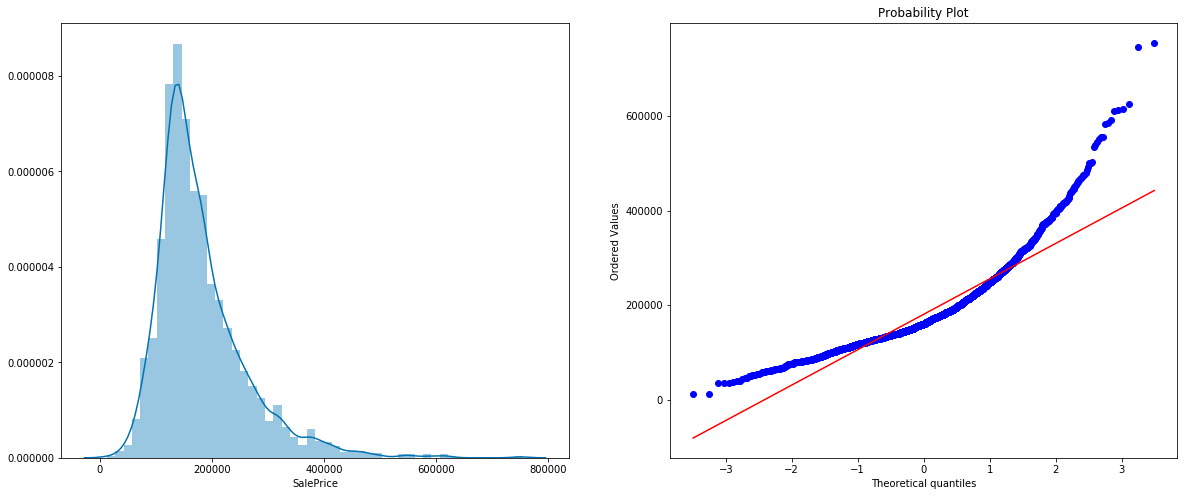

In [8]:
# Sale Prices - All

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,8))

sns.distplot(df_all['SalePrice'], bins=50, ax = ax[0])
stats.probplot(df_all['SalePrice'], plot = ax[1], )
    
fig.show()

# SalePrice, target, isn't normally distributed.

In [9]:
df_all.SalePrice.skew() # positive, i.e. most houses sold more than the avg price
df_all.SalePrice.kurt() 

# Needs transformation - do it later in preprocess section

1.7456464140742671

5.119827467942277

((array([-3.49454834, -3.25034572, -3.11527604, ...,  3.11527604,
          3.25034572,  3.49454834]),
  array([ 9.45641889,  9.48044384, 10.46027076, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.4052629946319149, 12.02035488162715, 0.9925100577907046))

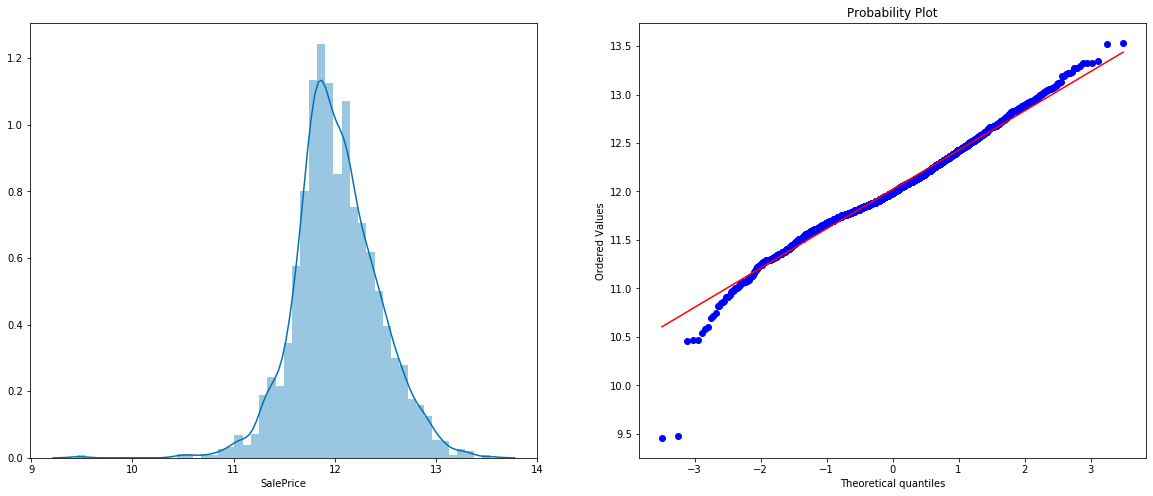

In [10]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,8))

sns.distplot(np.log1p(df_all['SalePrice']), bins=50, ax = ax[0])
stats.probplot(np.log1p(df_all['SalePrice']), plot = ax[1], )
    
fig.show()

In [11]:
np.log1p(df_all['SalePrice']).skew()
np.log1p(df_all['SalePrice']).kurt() 

-0.01211727929951353

1.5112668468313188

#### Features

In [12]:
cat_features = list(df_all.select_dtypes(exclude=np.number).columns)

num_features = list(df_all.select_dtypes(include=np.number).columns)
num_features.remove('Id')

date_features = ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']

len(cat_features) 
len(num_features)
len(date_features)

43

37

5

##### Numerical Features

In [13]:
top25_feats = df_train.corr()["SalePrice"].sort_values(ascending=False).head(26)[1:].index.to_list()
top25_feats

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea']

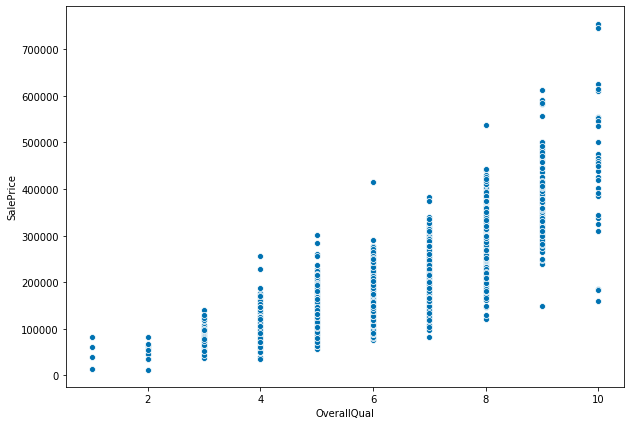

In [14]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=df_all)

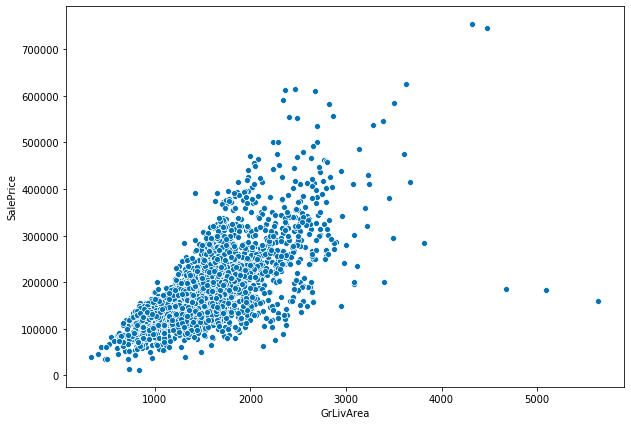

In [15]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_all)

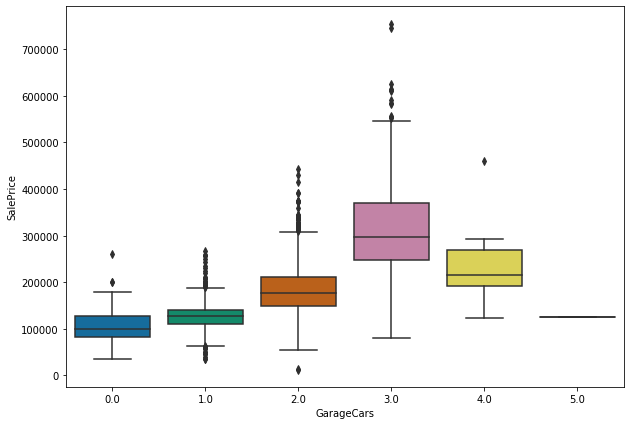

In [16]:
sns.boxplot(x='GarageCars',y='SalePrice',data=df_all)

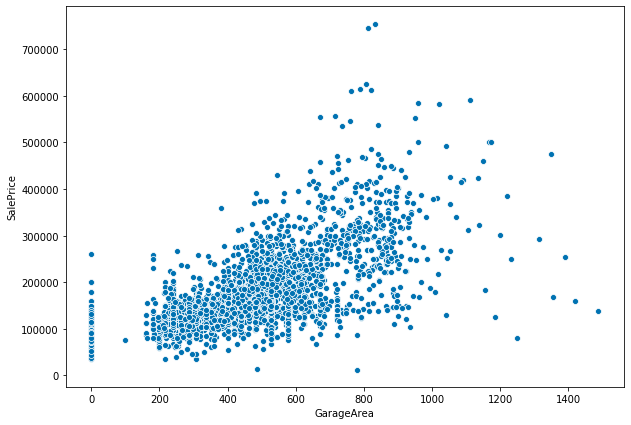

In [17]:
sns.scatterplot(x='GarageArea',y='SalePrice',data=df_all)

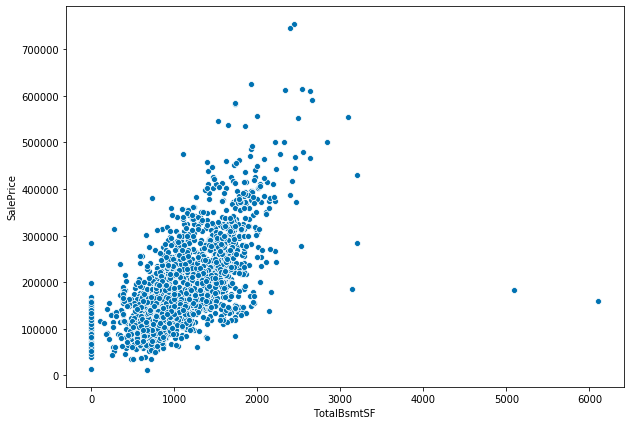

In [18]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df_all)

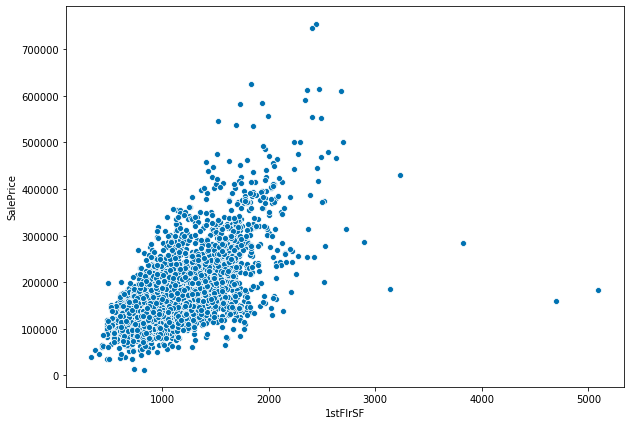

In [19]:
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=df_all)

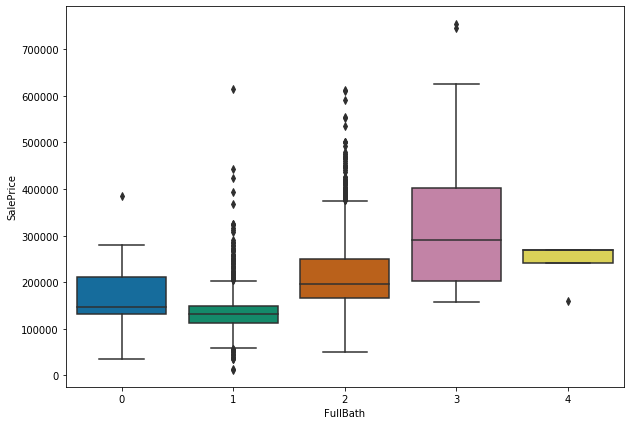

In [20]:
sns.boxplot(x='FullBath',y='SalePrice',data=df_all)

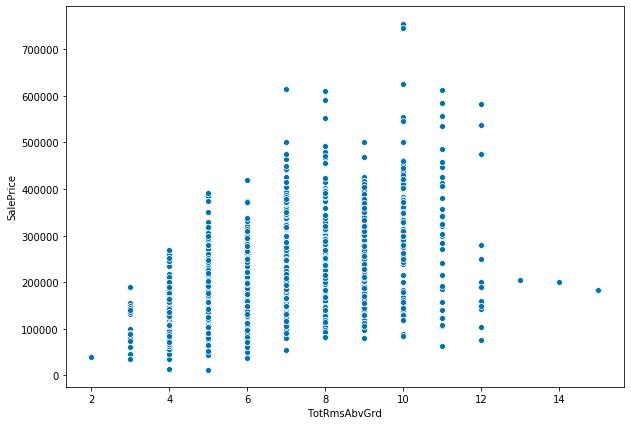

In [21]:
sns.scatterplot(x='TotRmsAbvGrd',y='SalePrice',data=df_all)

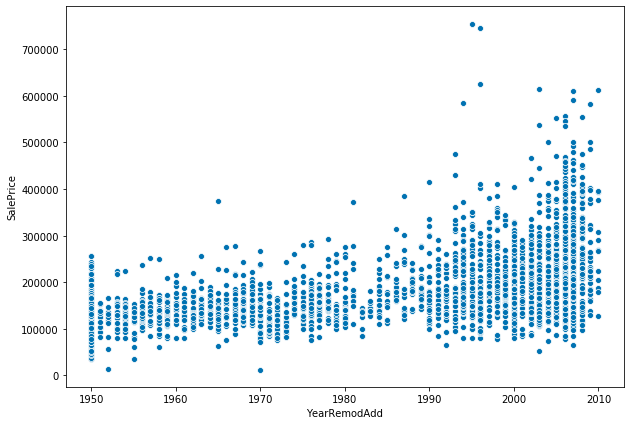

In [22]:
sns.scatterplot(x='YearRemodAdd',y='SalePrice',data=df_all)

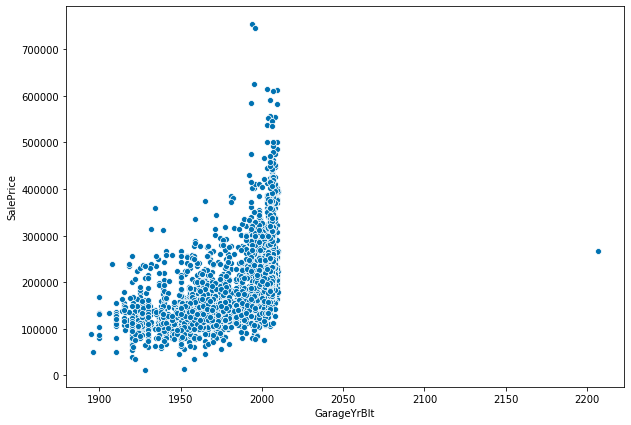

In [23]:
sns.scatterplot(x='GarageYrBlt',y='SalePrice',data=df_all)
# yr > 2200 obviously not correct -> deal this later in feature eng section

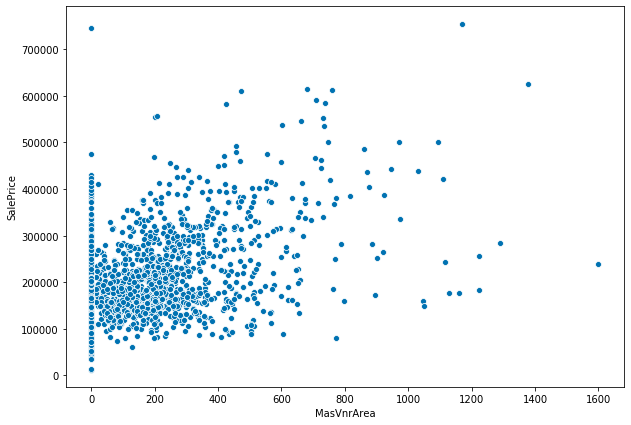

In [24]:
sns.scatterplot(x='MasVnrArea',y='SalePrice',data=df_all)

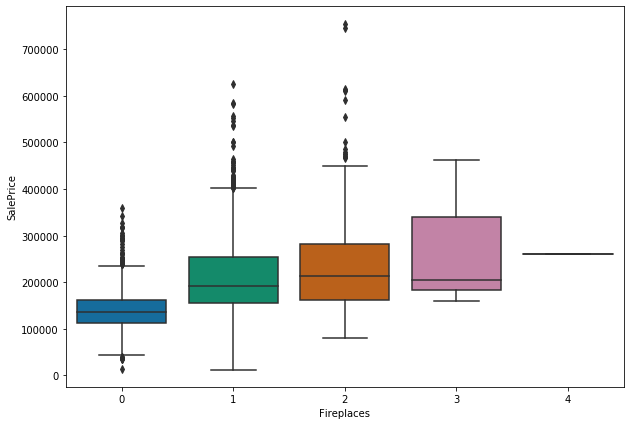

In [25]:
sns.boxplot(x='Fireplaces',y='SalePrice',data=df_all)

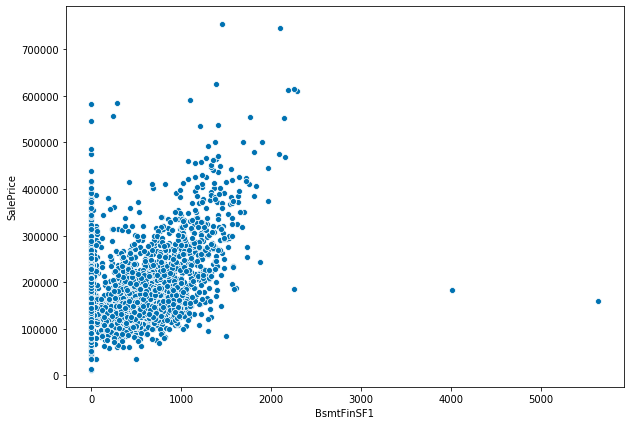

In [26]:
sns.scatterplot(x='BsmtFinSF1',y='SalePrice',data=df_all)

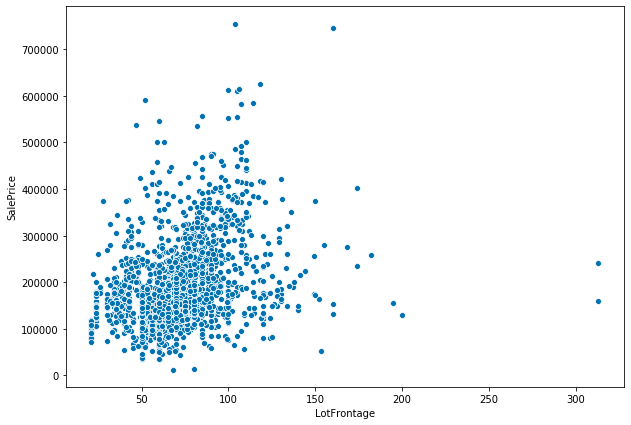

In [27]:
sns.scatterplot(x='LotFrontage',y='SalePrice',data=df_all)

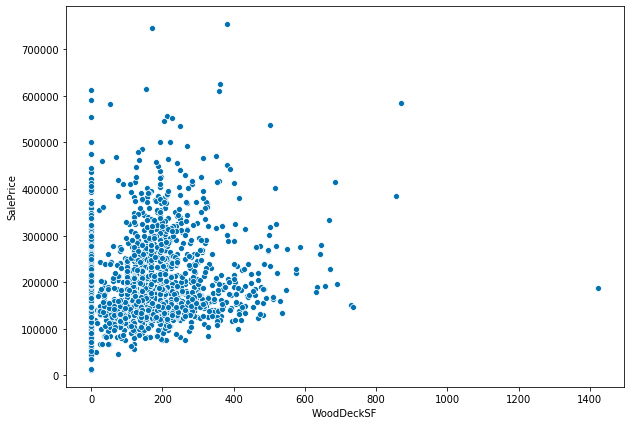

In [28]:
sns.scatterplot(x='WoodDeckSF',y='SalePrice',data=df_all)

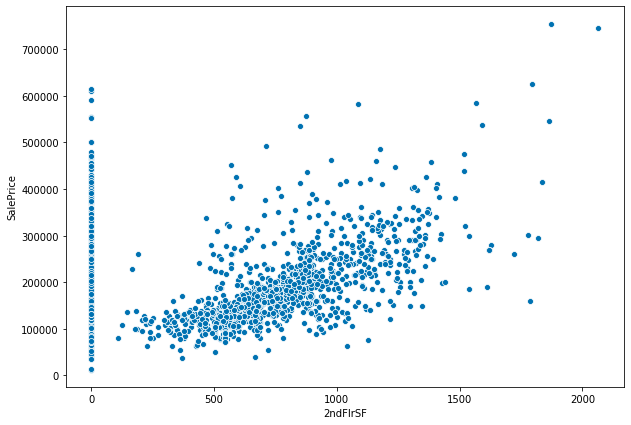

In [29]:
sns.scatterplot(x='2ndFlrSF',y='SalePrice',data=df_all)

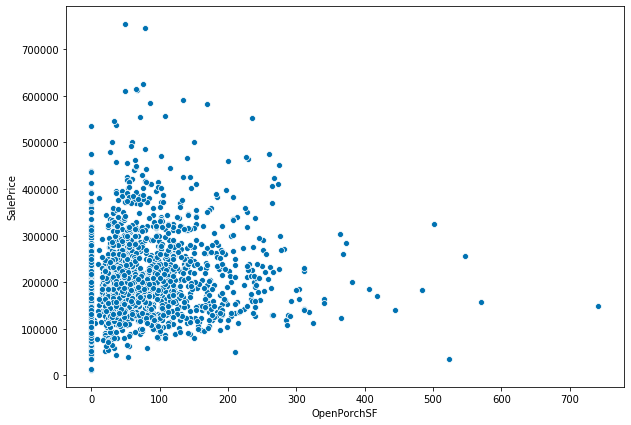

In [30]:
sns.scatterplot(x='OpenPorchSF',y='SalePrice',data=df_all)

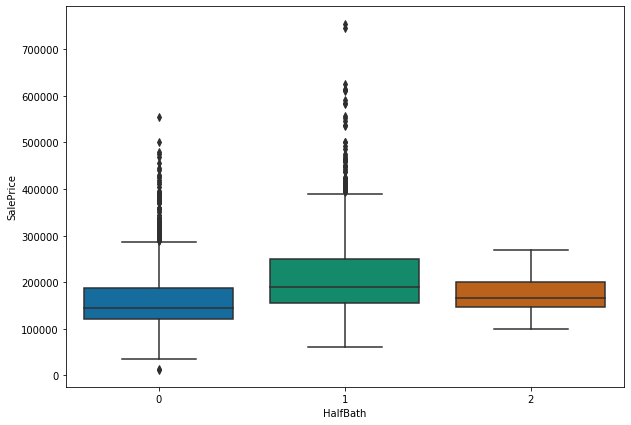

In [31]:
sns.boxplot(x='HalfBath',y='SalePrice',data=df_all)

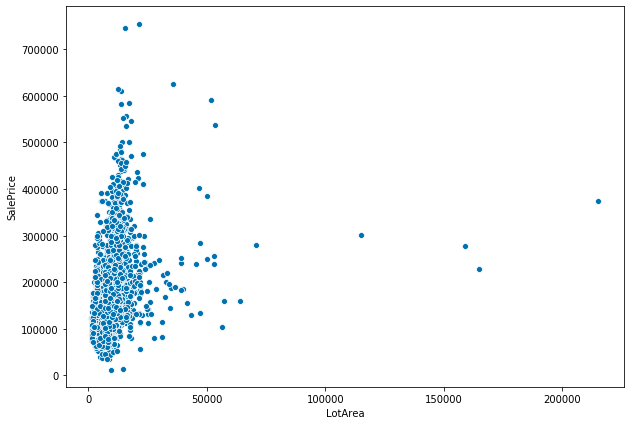

In [32]:
sns.scatterplot(x='LotArea',y='SalePrice',data=df_all)

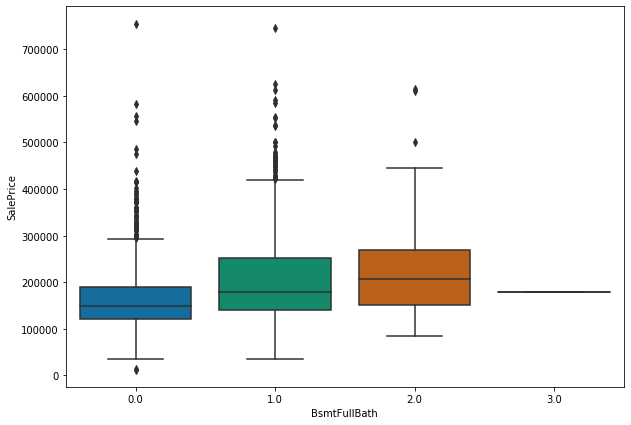

In [33]:
sns.boxplot(x='BsmtFullBath',y='SalePrice',data=df_all)

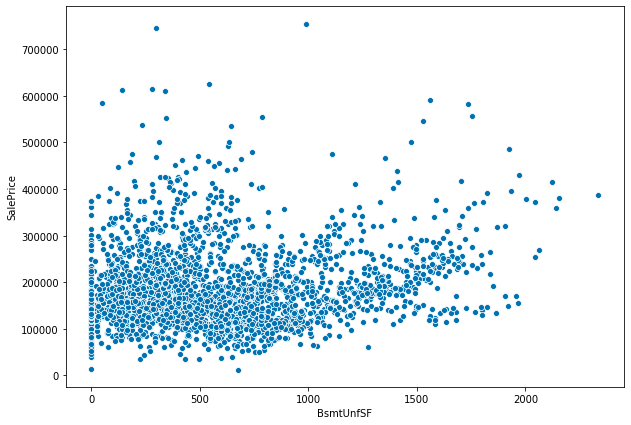

In [34]:
sns.scatterplot(x='BsmtUnfSF',y='SalePrice',data=df_all)

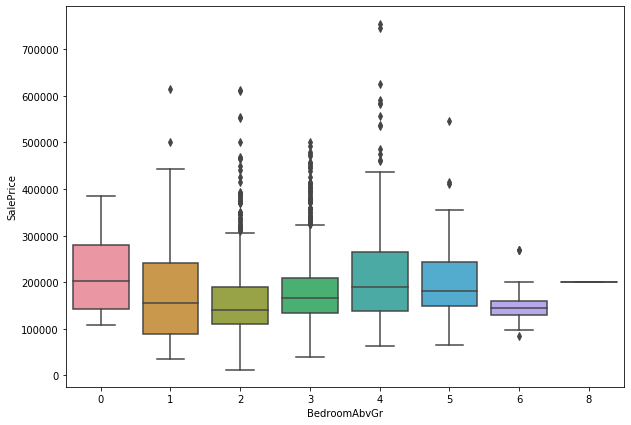

In [35]:
sns.boxplot(x='BedroomAbvGr',y='SalePrice',data=df_all)

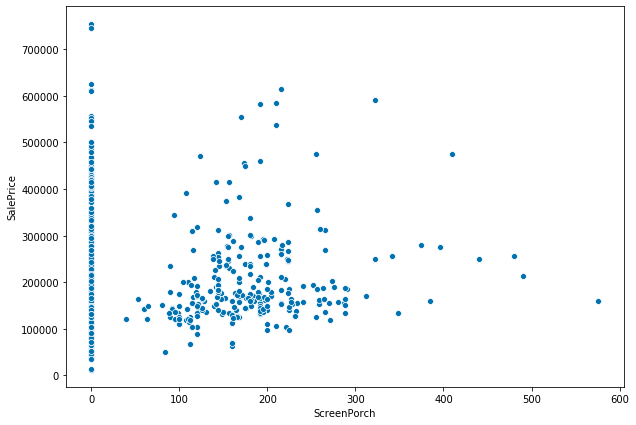

In [36]:
sns.scatterplot(x='ScreenPorch',y='SalePrice',data=df_all)

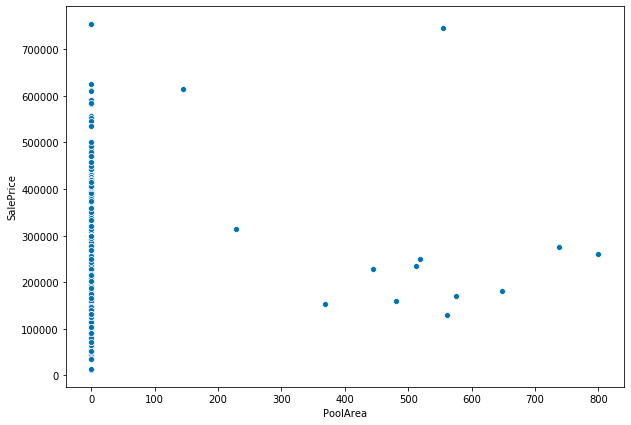

In [37]:
sns.scatterplot(x='PoolArea',y='SalePrice',data=df_all)

##### Categorical Features

In [38]:
from utils.plot_utils import *

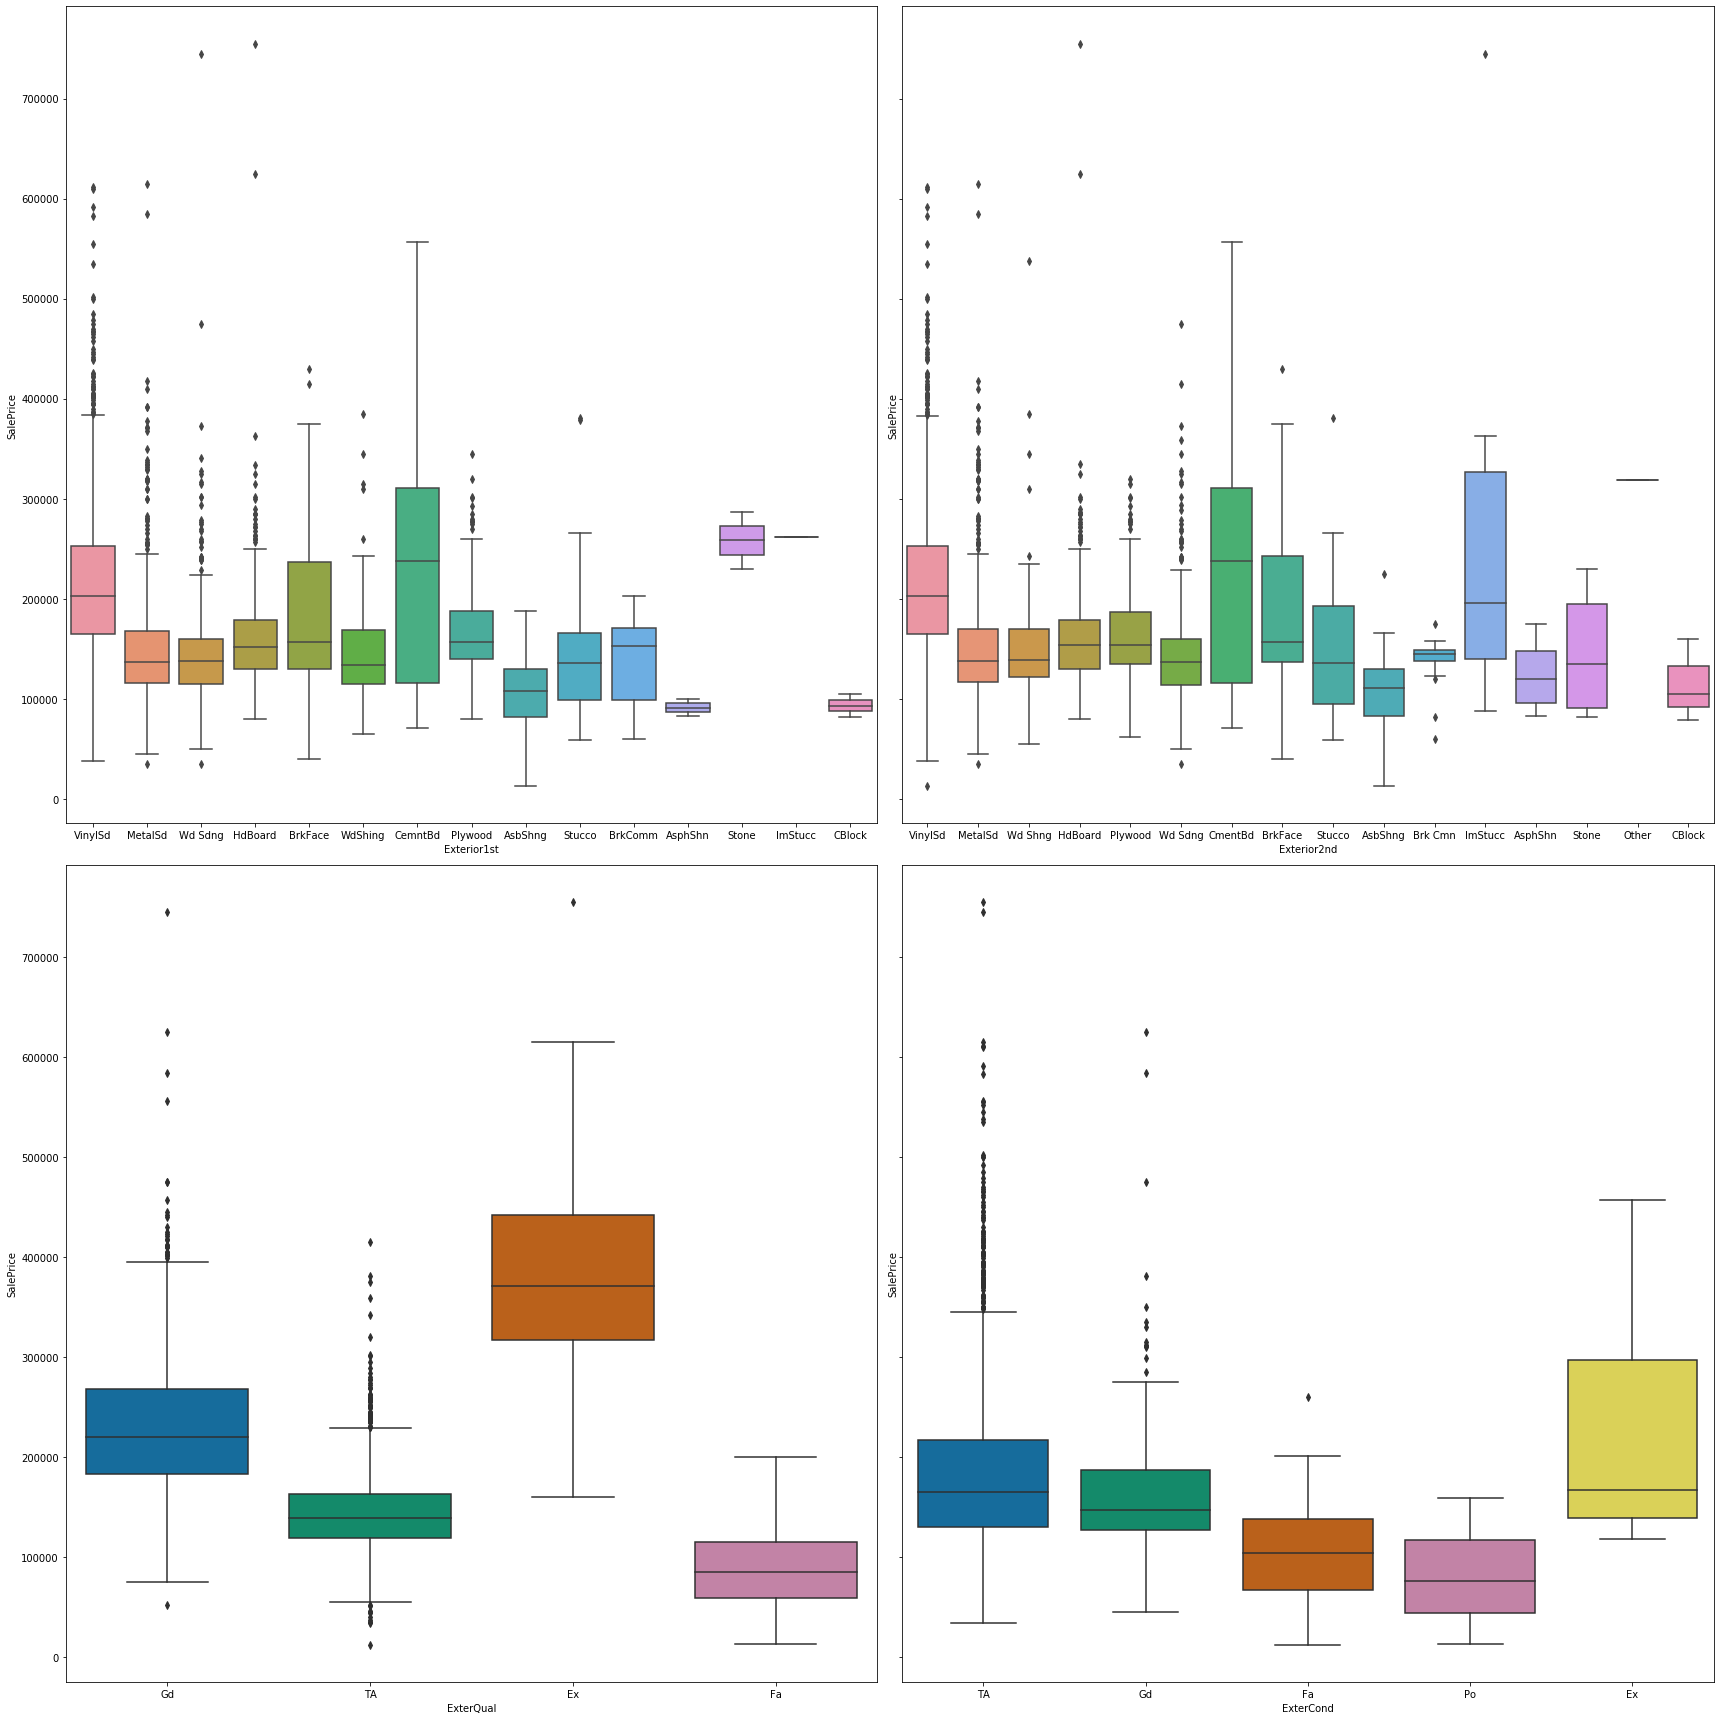

In [39]:
# Exterior
    
boxplots_with_multiple_categories(df_all,df_all.SalePrice,'Exter')

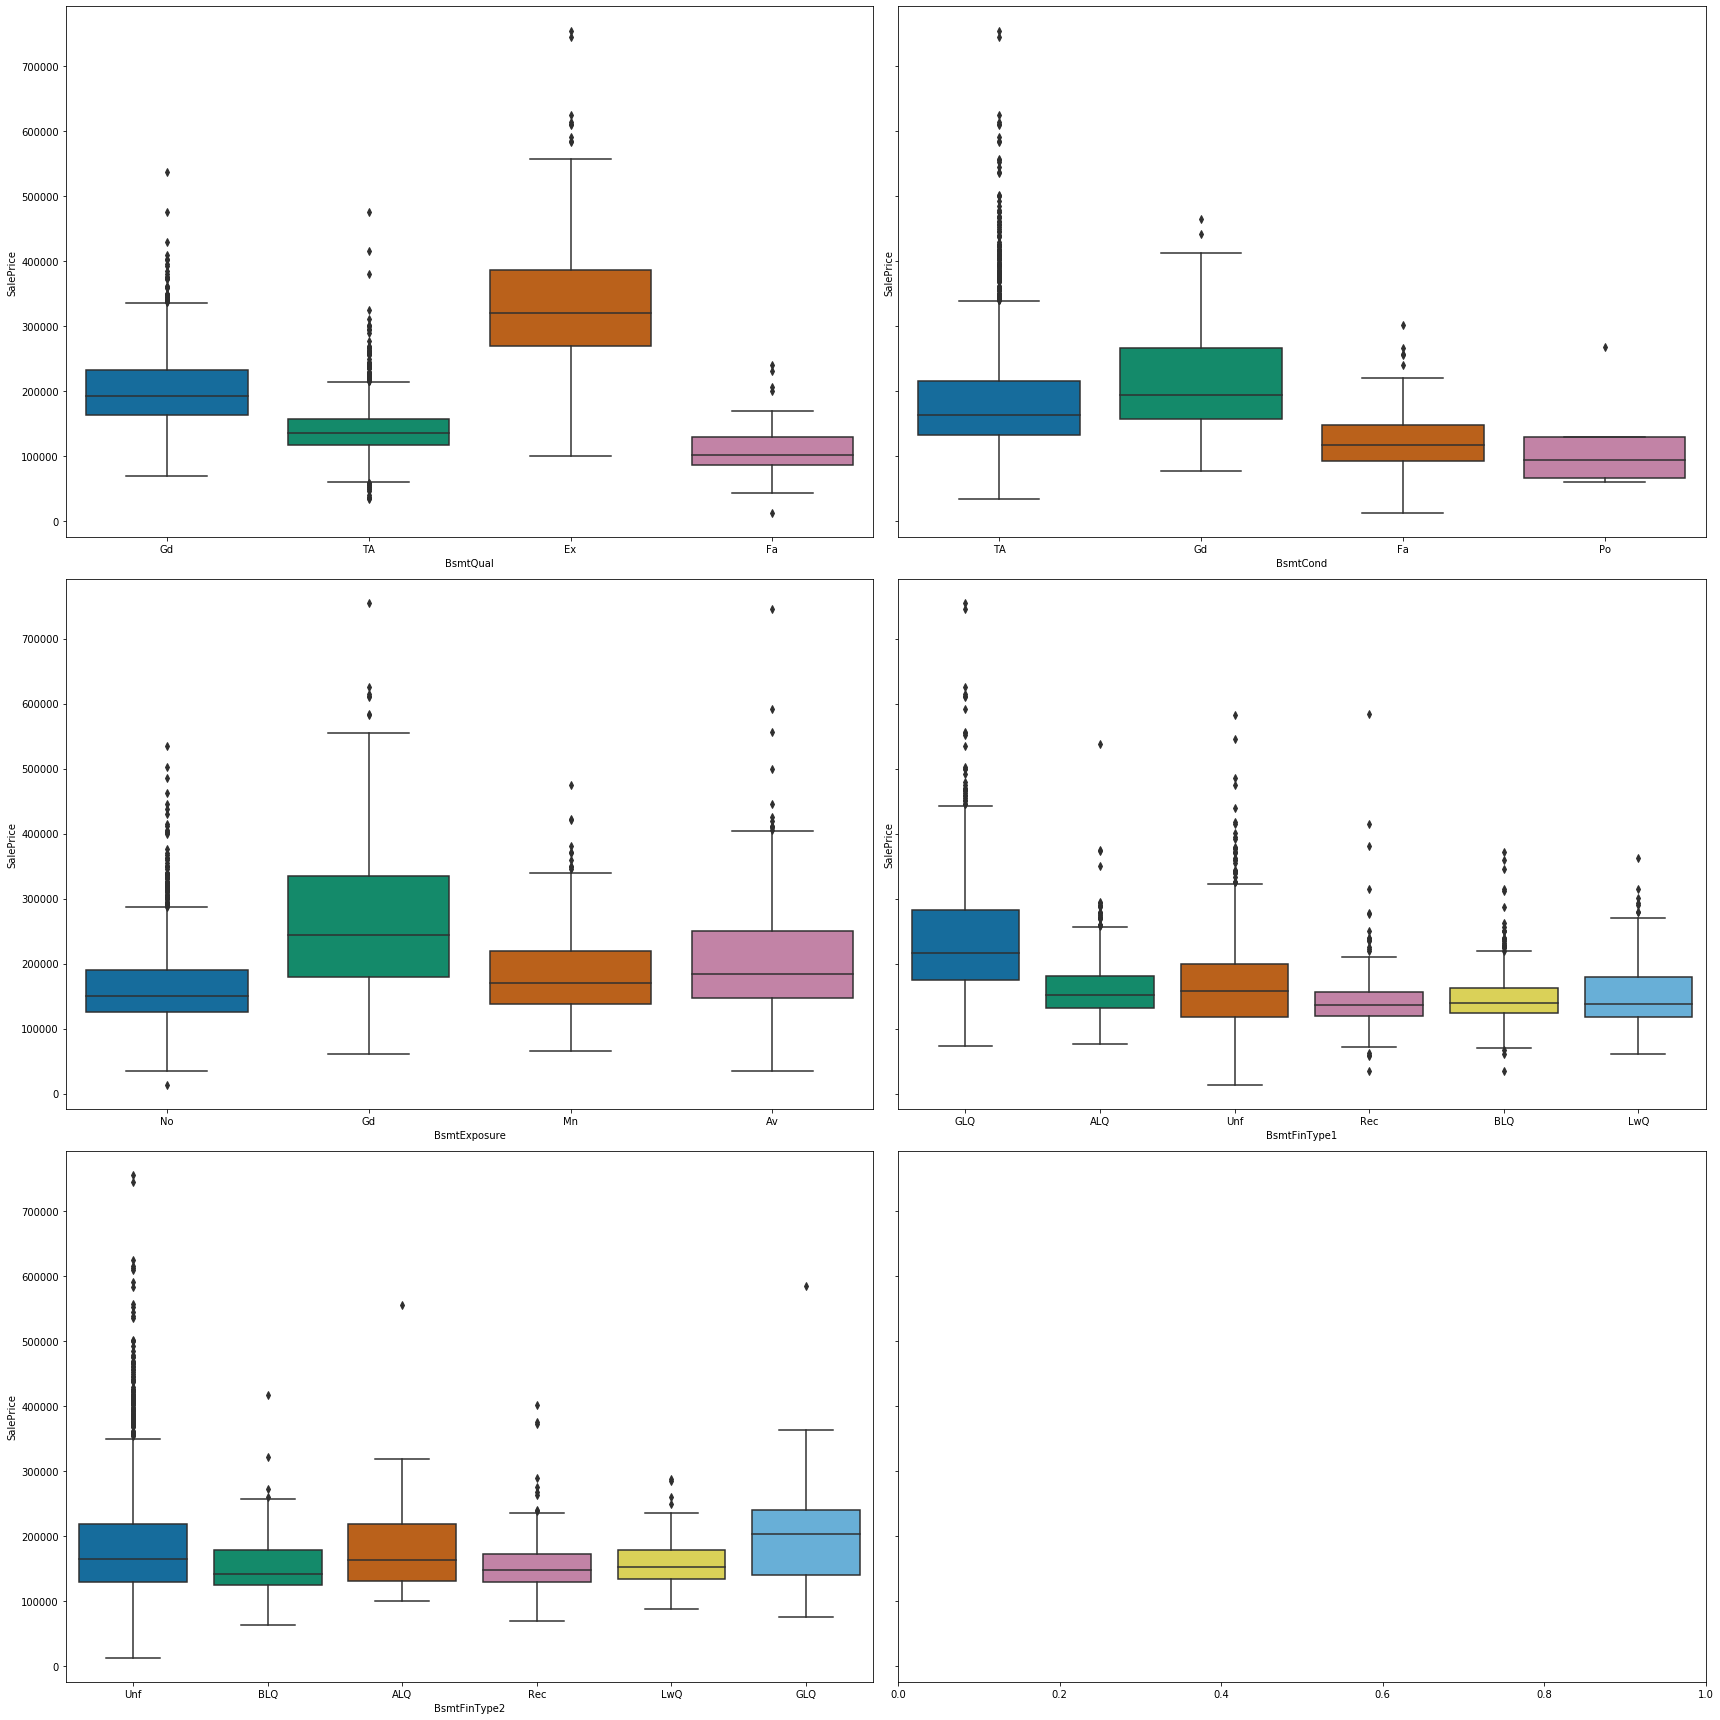

In [40]:
# Bsmt

boxplots_with_multiple_categories(df_all[cat_features],df_all.SalePrice,'Bsmt')

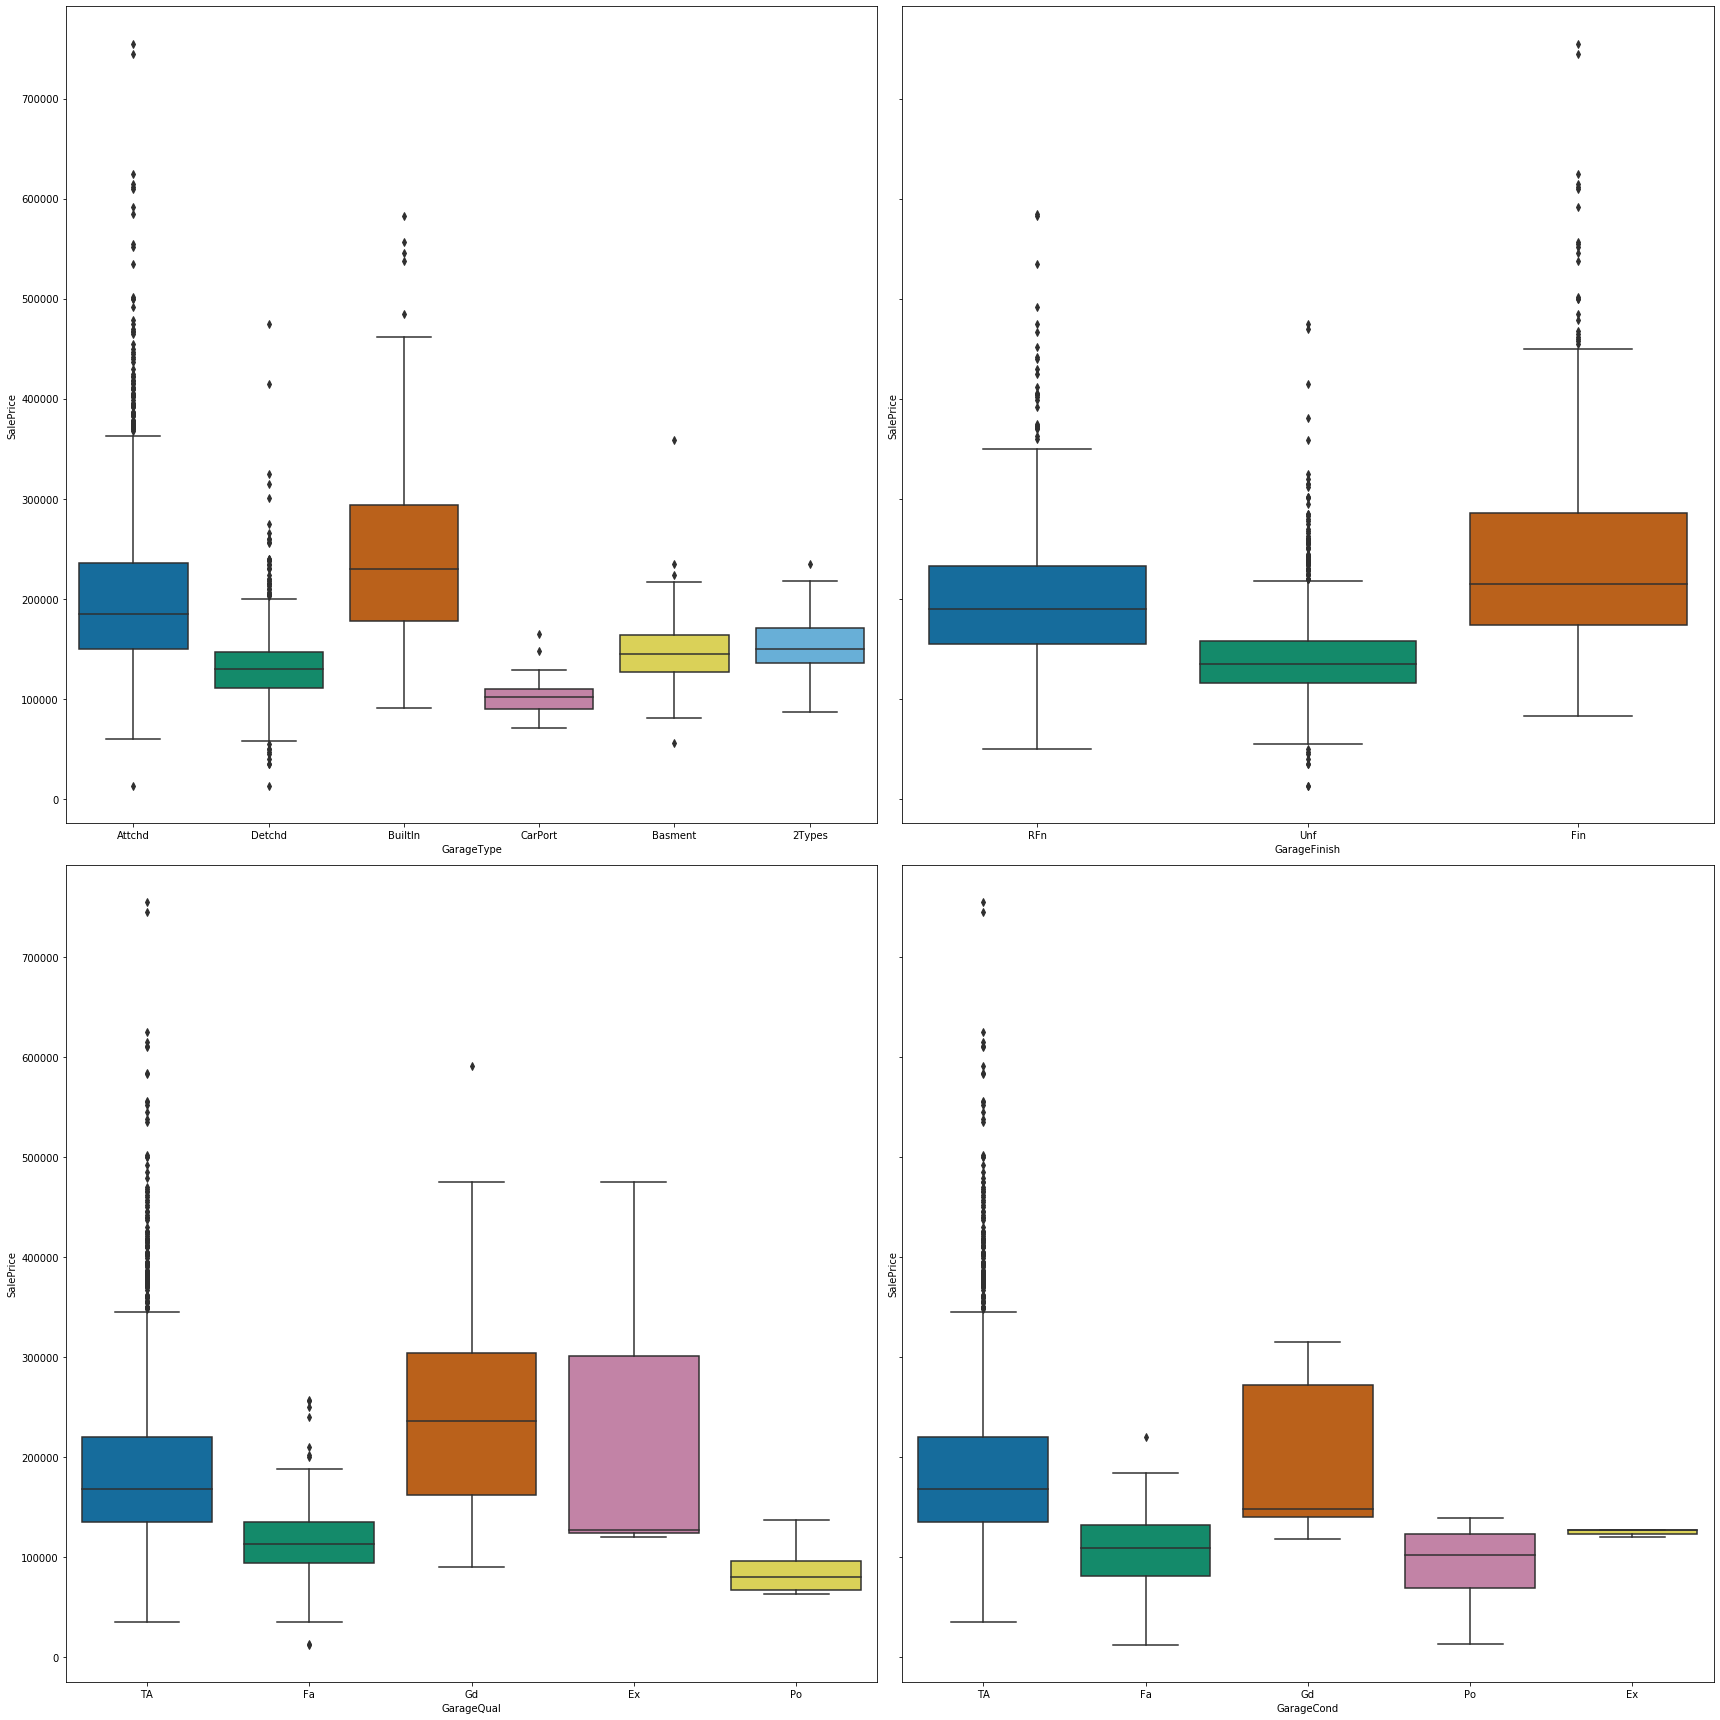

In [41]:
# Garage

boxplots_with_multiple_categories(df_all[cat_features],df_all.SalePrice,'Garage')

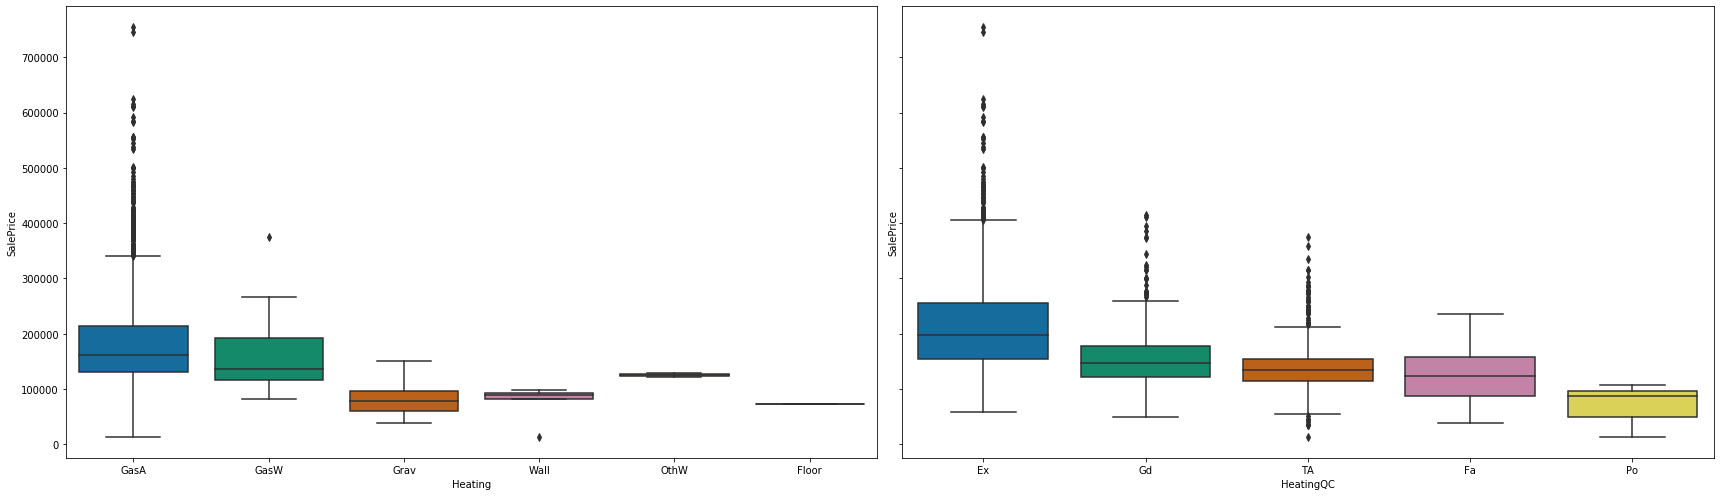

In [42]:
# Heating

boxplots_with_multiple_categories(df_all[cat_features],df_all.SalePrice,'Heating')

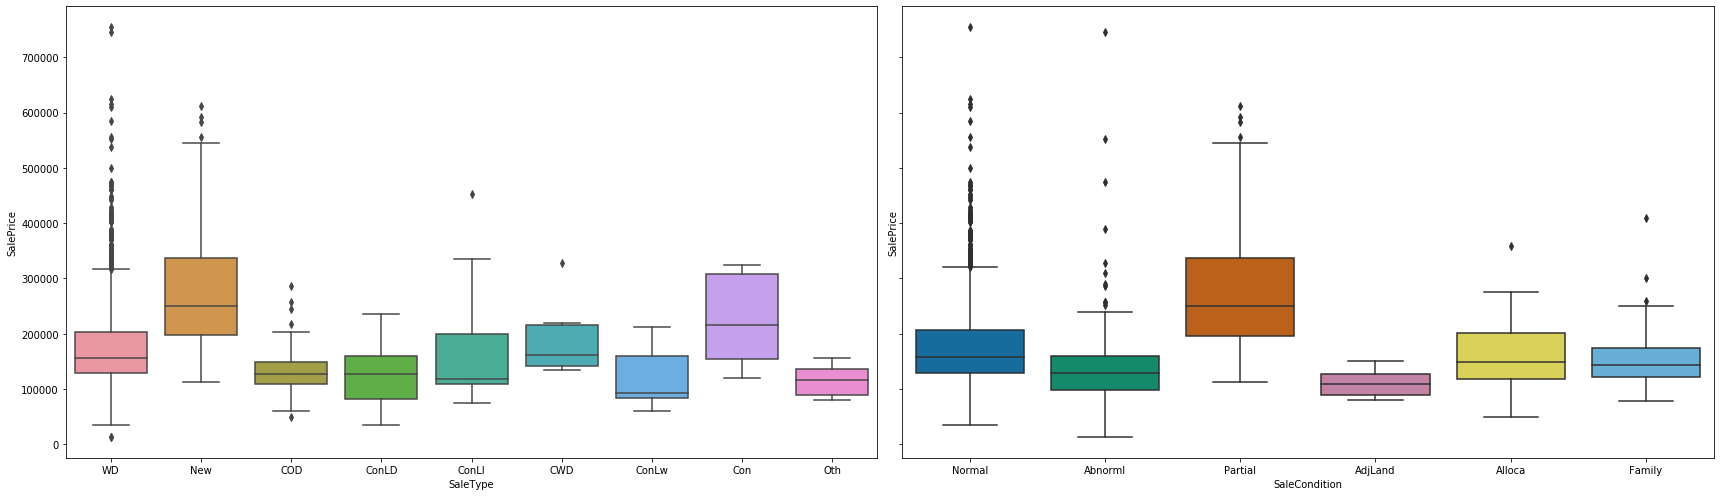

In [43]:
# Sale

boxplots_with_multiple_categories(df_all[cat_features],df_all.SalePrice,'Sale')

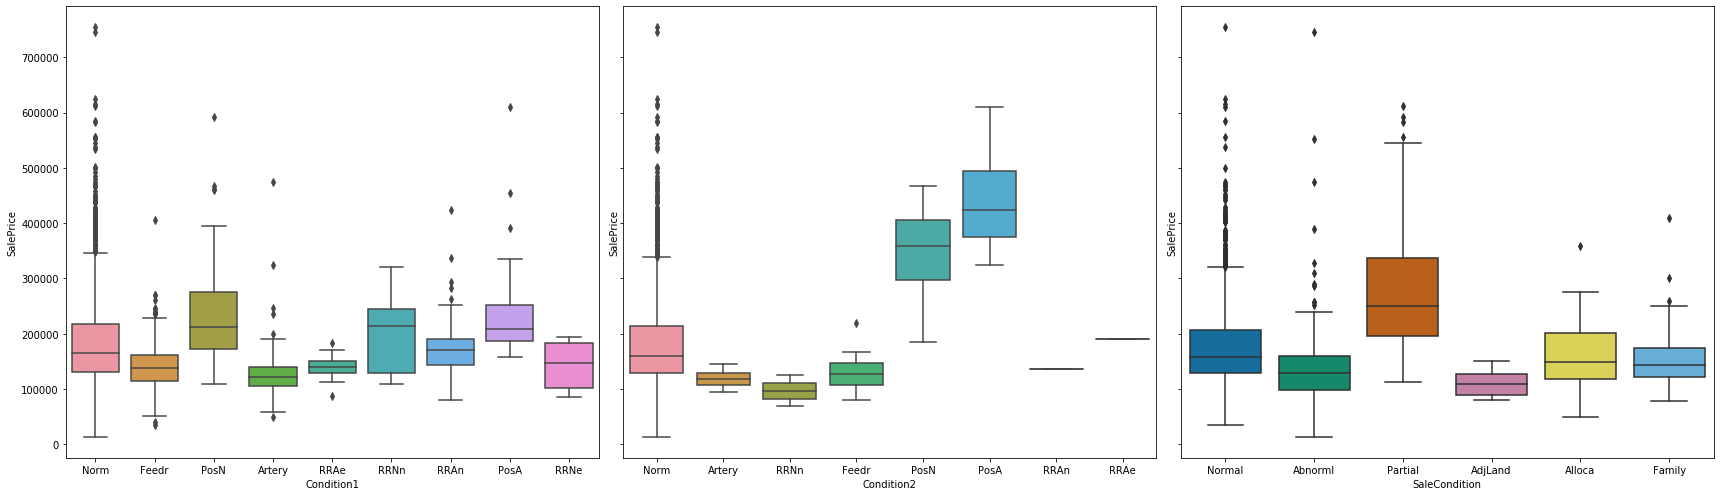

In [44]:
# Condition

boxplots_with_multiple_categories(df_all[cat_features],df_all.SalePrice,'Condition')

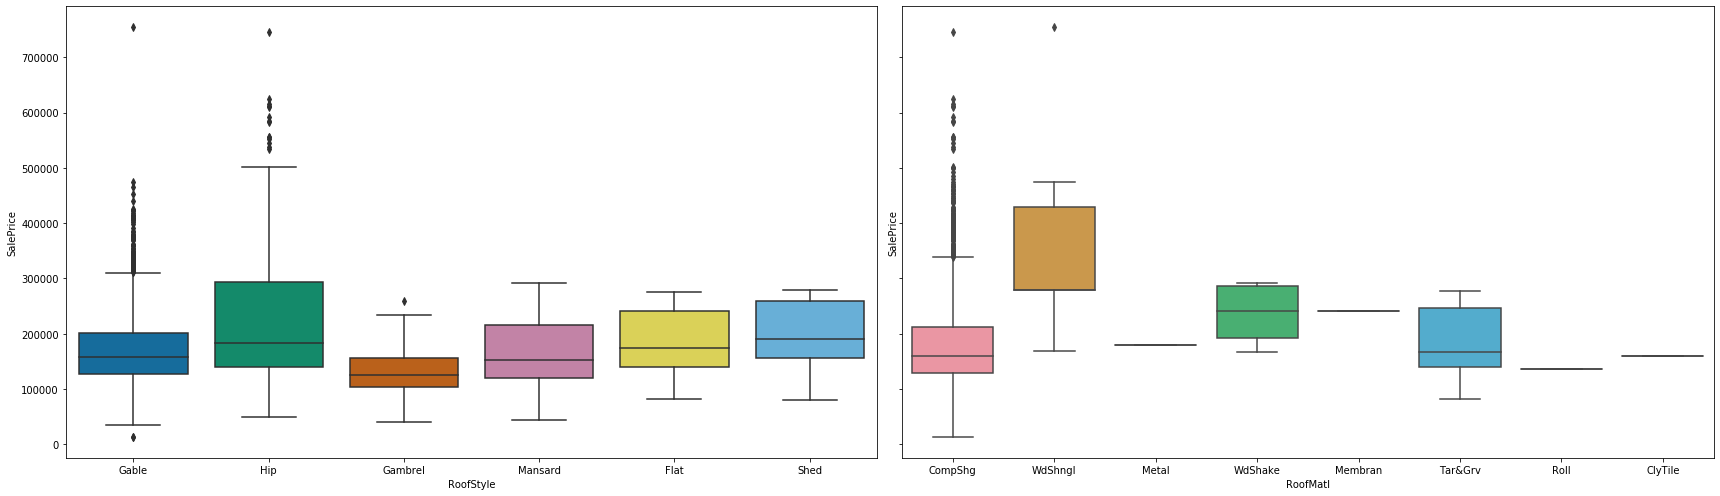

In [45]:
# Roof

boxplots_with_multiple_categories(df_all[cat_features],df_all.SalePrice,'Roof')

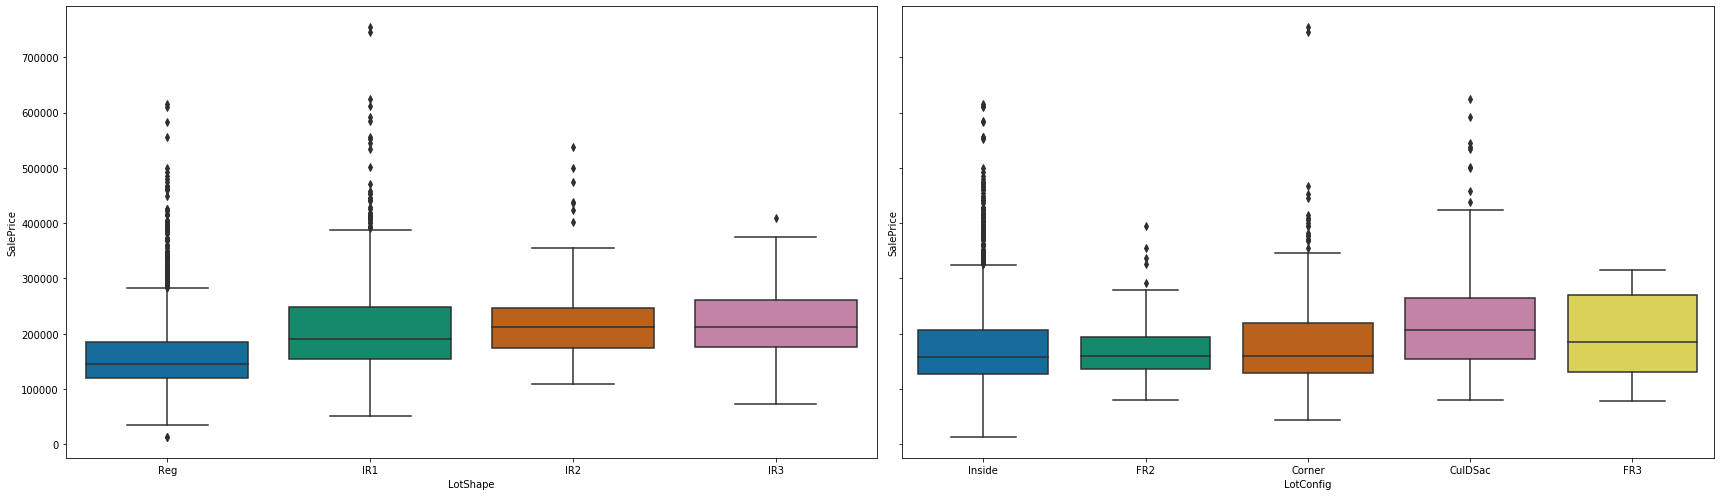

In [46]:
# Lot

boxplots_with_multiple_categories(df_all[cat_features],df_all.SalePrice,'Lot')

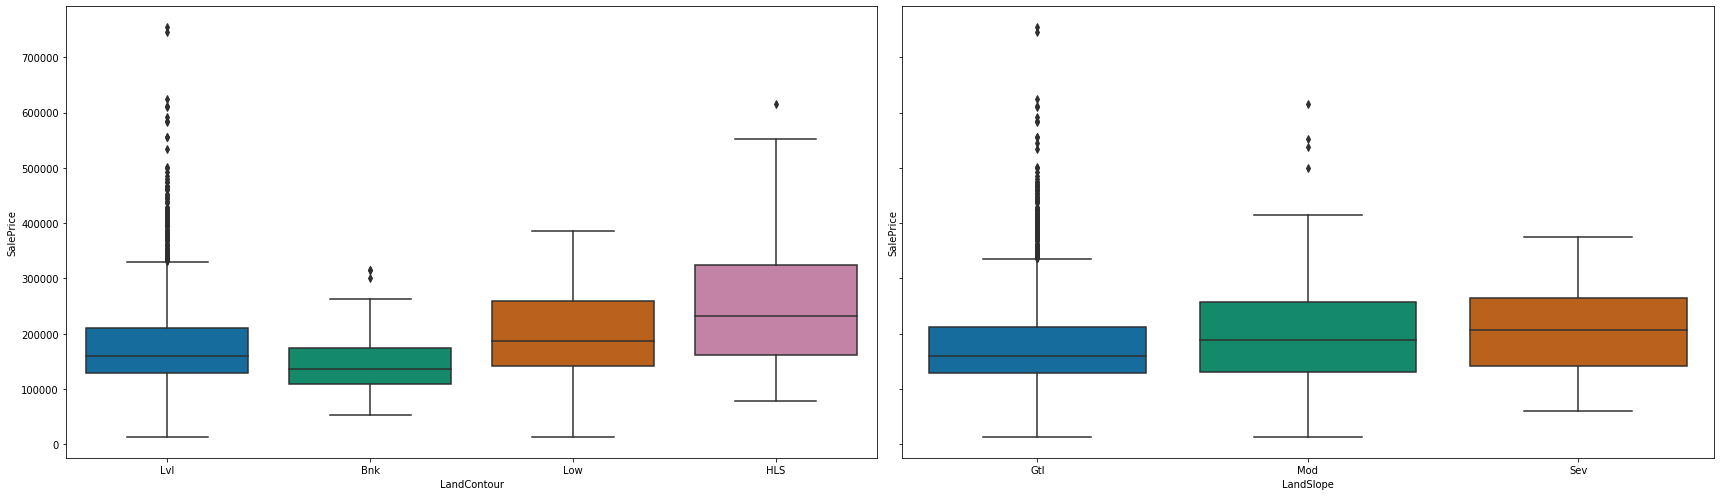

In [47]:
# Land

boxplots_with_multiple_categories(df_all[cat_features],df_all.SalePrice,'Land')

Other categorical variables that may worth mentioning..  

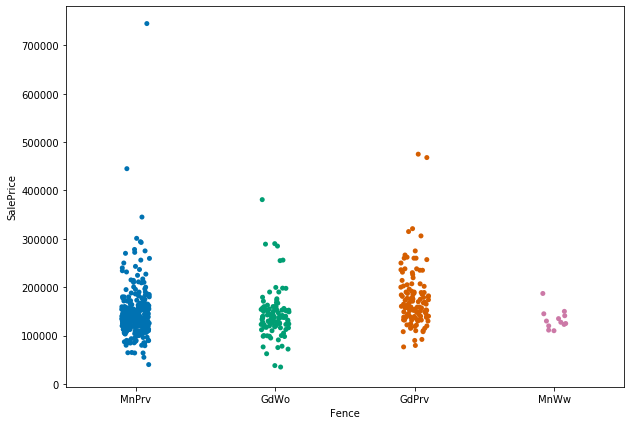

In [48]:
# Fence

sns.stripplot(x='Fence',y='SalePrice',data=df_all)

<Figure size 1728x504 with 0 Axes>

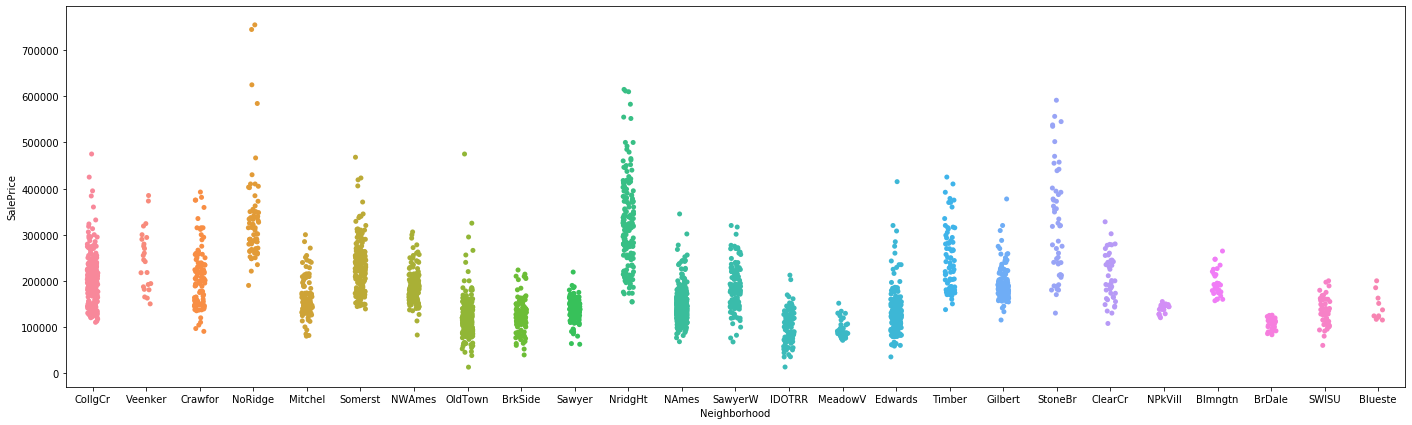

In [49]:
# Neighborhood
plt.figure(figsize=(24,7))
sns.stripplot(x='Neighborhood',y='SalePrice',data=df_all)

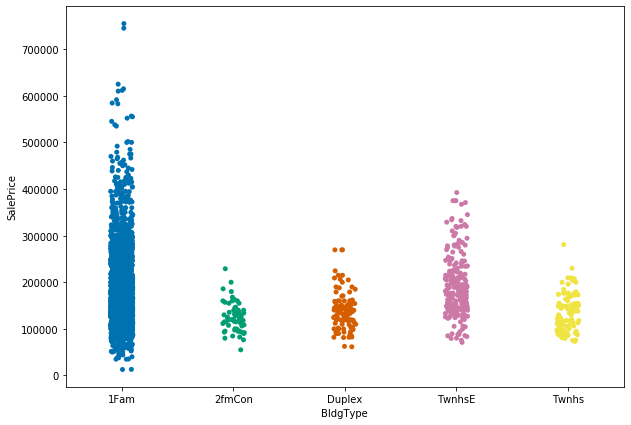

In [50]:
# BldgType

sns.stripplot(x='BldgType',y='SalePrice',data=df_all)

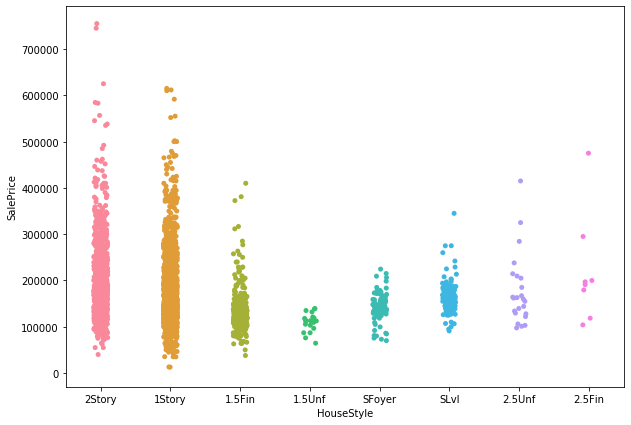

In [51]:
# HouseStyle

sns.stripplot(x='HouseStyle',y='SalePrice',data=df_all)

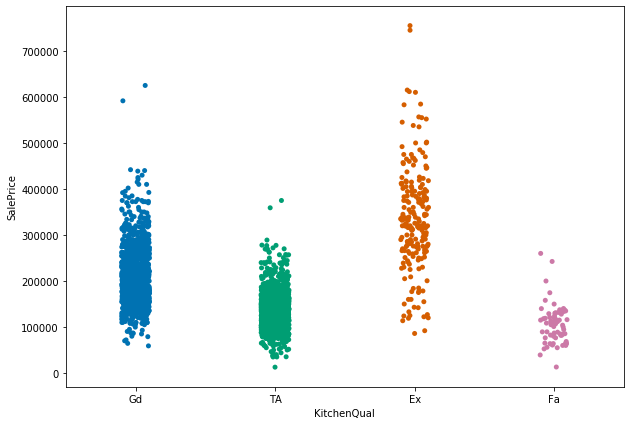

In [52]:
# KitchenQual

sns.stripplot(x='KitchenQual',y='SalePrice',data=df_all)

##### Time Series

In [53]:
# ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

<Figure size 1728x504 with 0 Axes>

Text(0.5, 1.0, 'Sale Price across YrMoSold')

(732312.000, 733954.000)

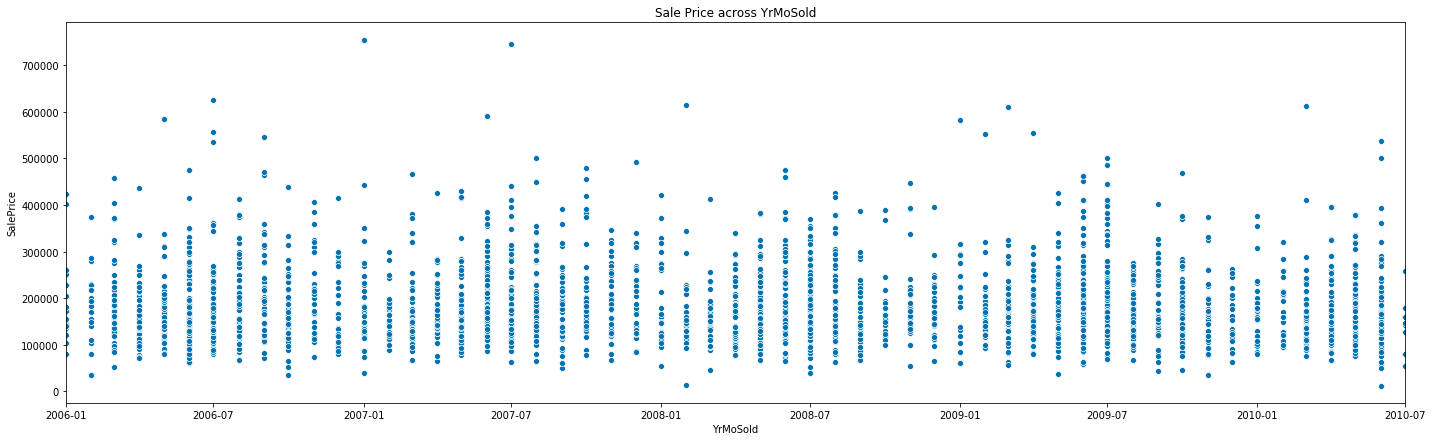

In [54]:
# YrMoSold

df_all['YrMoSold'] = df_all['YrSold'].astype(str) + '-' + df_all['MoSold'].astype(str)
df_all['YrMoSold'] = pd.to_datetime(df_all.YrMoSold, format='%Y-%m')

plt.figure(figsize=(24,7))
plt.title('Sale Price across YrMoSold')
sns.scatterplot(x='YrMoSold', y='SalePrice', data=df_all)
plt.xlim(min(df_all['YrMoSold']),max(df_all['YrMoSold']))

<Figure size 1728x504 with 0 Axes>

Text(0.5, 1.0, 'HouseAge vs SalePrice')

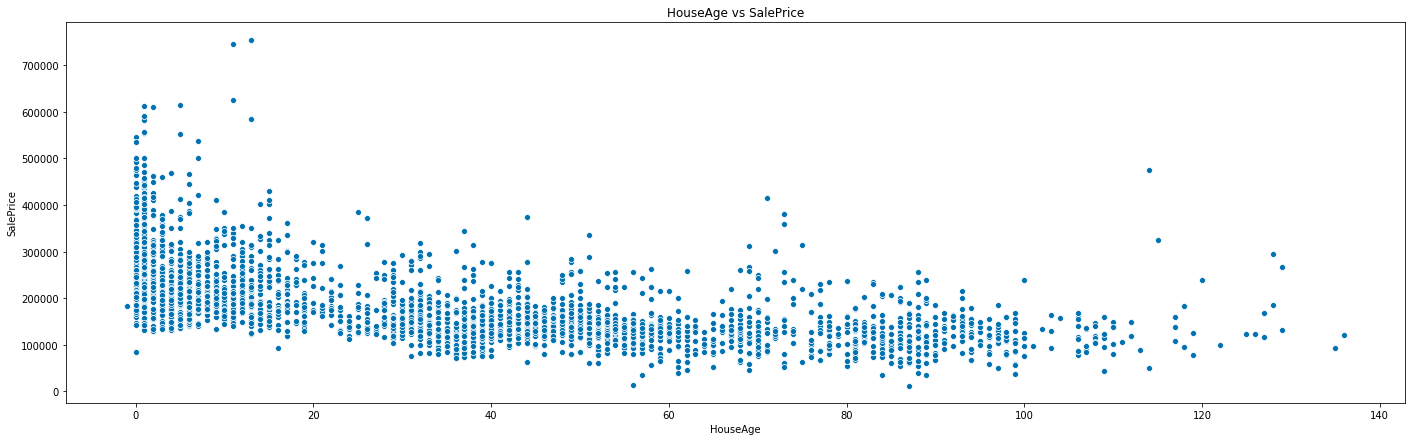

In [55]:
# YearBuilt -> house age
df_all['YearBuilt'] = pd.to_datetime(df_all.YearBuilt, format='%Y')
df_all['YrSold'] = pd.to_datetime(df_all.YrSold, format='%Y')
df_all['HouseAge'] = ((df_all['YrSold'] - df_all['YearBuilt'])/365).dt.days #years

plt.figure(figsize=(24,7))
plt.title('HouseAge vs SalePrice')
sns.scatterplot(x='HouseAge', y='SalePrice', data=df_all)

In [56]:
df_all = df_all.drop('YrMoSold',axis=1)

### Feature_Engineering

In [57]:
# first some drops

# drop some columns that make no sense to add it to the models - due to highly unbalanced data
# and id column (already have index for this)
drop_list = ['Id','Street','PoolQC','Utilities','HouseAge']

df_all = df_all.drop(drop_list, axis=1)

In [58]:
# some corrections

df_all[df_all.GarageYrBlt > 2010]

# one row with 2207 sold at 2007, so GarageYrBlt should probably be 2007
df_all.at[2592, 'GarageYrBlt'] = 2007

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2592,20,RL,68.0,8298,NaN,IR1,HLS,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006-01-01,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,0,9,2007-01-01,New,Partial,267300


In [59]:
# fill missing columns

# 1 - Other
missing = ['Alley','MiscFeature','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual',
            'GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']

for i in missing:
    df_all[i] = df_all[i].fillna('Other')
    
# 2 - zero
missing = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt','GarageArea','GarageCars','MasVnrArea']

for i in missing:
    df_all[i] = df_all[i].fillna(0)
    
# 3 - some meaningful filling for this column
df_all['LotFrontage'] = df_all.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

# change some types do that we get the correct cat_features list
# since some numerical features are actuall categorical - like overallcong and qual

num_to_cat_list = ['OverallCond','OverallQual','MSSubClass','GarageYrBlt','MoSold','YrSold','YearBuilt','YearRemodAdd']

for x in num_to_cat_list: 
    df_all[x] = df_all[x].astype(str)

# 4 - the rest = majority
df_all['MSZoning'] = df_all.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
df_all['Functional'] = df_all['Functional'].fillna('Typ') 
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0]) 
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])
df_all['KitchenQual'] = df_all['KitchenQual'].fillna("TA") 
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])
df_all['Electrical'] = df_all['Electrical'].fillna("SBrkr") 

# check
df_all.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

### Preprocess

In [60]:
# fix skewed features

# imports
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

num_features = list(df_all.select_dtypes(include=np.number).columns)
num_features.remove('SalePrice')
skew_features = df_all[num_features].apply(lambda x: skew(x))
skew_features

LotFrontage       1.460429
LotArea          12.822431
MasVnrArea        2.613592
BsmtFinSF1        1.425230
BsmtFinSF2        4.146143
BsmtUnfSF         0.919339
TotalBsmtSF       1.156894
1stFlrSF          1.469604
2ndFlrSF          0.861675
LowQualFinSF     12.088761
GrLivArea         1.269358
BsmtFullBath      0.624832
BsmtHalfBath      3.931594
FullBath          0.167606
HalfBath          0.694566
BedroomAbvGr      0.326324
KitchenAbvGr      4.302254
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
GarageCars       -0.219581
GarageArea        0.239257
WoodDeckSF        1.842433
OpenPorchSF       2.535114
EnclosedPorch     4.003891
3SsnPorch        11.376065
ScreenPorch       3.946694
PoolArea         16.898328
MiscVal          21.947195
dtype: float64

In [61]:
# boxcox on skewed data

from utils.preprocess_utils import *
        
boxcox_on_skewed_features(df=df_all,target='SalePrice',s=0.75)

In [62]:
# create new features

# SF
df_all['TotalSF'] = (df_all['TotalBsmtSF'] + df_all['1stFlrSF'] + df_all['2ndFlrSF'])
df_all['TotalPorchSF'] = (df_all['OpenPorchSF'] + df_all['3SsnPorch'] + df_all['EnclosedPorch'] + df_all['ScreenPorch'] + df_all['WoodDeckSF'])
# tbh, idk if it makes sense to multiply halfbaths w/ 0.5 but here we go
df_all['TotalBath'] = (df_all['FullBath'] + (0.5 * df_all['HalfBath']) + df_all['BsmtFullBath'] + (0.5 * df_all['BsmtHalfBath']))
                               
# some binary variables                              
df_all['HasPool'] = df_all['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['Has2ndFloor'] = df_all['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['HasGarage'] = df_all['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['HasBsmt'] = df_all['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['HasFireplace'] = df_all['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [63]:
df_all = pd.get_dummies(df_all)
df_all.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF,TotalPorchSF,TotalBath,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,...,GarageCond_Fa,GarageCond_Gd,GarageCond_Other,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Other,MiscFeature_Gar2,MiscFeature_Other,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006-01-01,YrSold_2007-01-01,YrSold_2008-01-01,YrSold_2009-01-01,YrSold_2010-01-01,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,15.086529,13.424521,19.378556,117.855863,0.0,30.016554,296.832332,5.318379,1019.540925,0.0,7.234116,1.0,0.00000,2,1,3,0.75096,2.238463,0,2.0,548.0,0.000000,12.009559,0.000000,0.0,0.0,0.0,0.0,208500,1321.691636,12.009559,3.500000,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16.999617,13.694528,0.000000,146.805798,0.0,44.178887,407.302419,5.550627,0.000000,0.0,6.947212,0.0,0.71081,2,0,3,0.75096,1.978208,1,2.0,460.0,56.339211,0.000000,0.000000,0.0,0.0,0.0,0.0,181500,412.853045,56.339211,2.355405,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,15.484625,14.034134,17.721067,91.575284,0.0,56.957794,314.805061,5.362015,1034.306612,0.0,7.275132,1.0,0.00000,2,1,3,0.75096,1.978208,1,2.0,608.0,0.000000,9.849185,0.000000,0.0,0.0,0.0,0.0,223500,1354.473688,9.849185,3.500000,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,14.403229,13.683422,0.000000,52.776367,0.0,64.881734,268.234291,5.388291,899.200699,0.0,7.237970,1.0,0.00000,1,0,3,0.75096,2.116352,1,3.0,642.0,0.000000,8.921747,16.012022,0.0,0.0,0.0,0.0,140000,1172.823281,24.933769,2.000000,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,17.480327,14.550143,25.323124,112.040325,0.0,61.233857,376.259367,5.493031,1265.167952,0.0,7.470741,1.0,0.00000,2,1,4,0.75096,2.347900,1,3.0,836.0,42.351294,14.180239,0.000000,0.0,0.0,0.0,0.0,250000,1646.920351,56.531533,3.500000,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [64]:
# split train, test again
df_train = df_all[:1460]
df_test = df_all[1460:]

In [65]:
# separate target and features
X_train = df_train.drop('SalePrice',axis=1)
y_train = np.log1p(df_train['SalePrice']) # np.expm1(y_train) to get back to actuals
X_test = df_test.drop('SalePrice',axis=1)
y_test = np.log1p(df_test['SalePrice'])

### Models

Try followings for this regression problem:

- Linear Regression
- SVR
- KNN
- Random Forrest
- Decision Tree
- AdaBoost
- Bagging
- Gradient Boosting
- CatBoost 
- Stochastic Gradient Descent
- Lasso
- RidgeCV
- Kernel Ridge
- Bayesian Ridge
- Elastic Net

Note: For evaluation, real y_test values were used. These were not given in Kaggle's competition, instead obtained from Kaggle submissions.

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from utils.evaluate_utils import *

#### Linear_Regression

In [67]:
from sklearn.linear_model import LinearRegression

# hyperparameters to tune
fit_intercept = [True, False]
normalize = [True, False]
copy_X = [True, False]

# hyperparameter options
hyperparameters = dict(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X)
 
# cross-validation
lr = GridSearchCV(estimator=LinearRegression(), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
lr.fit(X_train, y_train)

# best model params
lr.best_params_

# predict & print scores using best model
get_regression_scores(lr, X_test, y_test)

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

MAE =  5234.109957990649
MSE =  3648002980.7577724
RMSE =  60398.7001578492
R2 =  -21055030027.78056


#### SVR

In [68]:
from sklearn.svm import SVR  

# hyperparameters to tune
kernel = ['rbf']
gamma = [1e-3, 0.01, 0.1]
C = [10, 100, 1000]

# hyperparameter options
hyperparameters = dict(kernel=kernel, gamma=gamma, C=C)
 
# cross-validation
svr = GridSearchCV(estimator=SVR(), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
svr.fit(X_train, y_train)

# best model params
svr.best_params_

# predict & print scores using best model
get_regression_scores(svr, X_test, y_test)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10, 100, 1000], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

MAE =  0.26856207504256674
MSE =  0.13177216852156895
RMSE =  0.3630043643285421
R2 =  0.23945594896338396


#### KNN

In [70]:
from sklearn.neighbors import KNeighborsRegressor

# hyperparameters to tune
weights = ['uniform','distance']
n_neighbors = [3,10,30,50]

# hyperparameter options
hyperparameters = dict(weights=weights, n_neighbors=n_neighbors)
 
# cross-validation
knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
knn.fit(X_train, y_train)

# best model params
knn.best_params_

# predict & print scores using best model
get_regression_scores(knn, X_test, y_test)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 10, 30, 50],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'n_neighbors': 10, 'weights': 'distance'}

MAE =  0.14903204530857303
MSE =  0.047131130218667716
RMSE =  0.21709705253334904
R2 =  0.727975177849695


#### Random_Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor

# hyperparameters to tune
n_estimators = [10,30,50,100]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [2,4,8]

# hyperparameter options
hyperparameters = dict(n_estimators=n_estimators, max_features=max_features, min_samples_split=min_samples_split)
 
# cross-validation
rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
rf.fit(X_train, y_train)

# best model params
rf.best_params_

# predict & print scores using best model
get_regression_scores(rf, X_test, y_test)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

{'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}

MAE =  0.10084132940411986
MSE =  0.024679360687117926
RMSE =  0.15709666033088648
R2 =  0.8575591404120957


#### Decision_Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

# hyperparameters to tune
min_samples_split = [2,4,8]

# hyperparameter options
hyperparameters = dict(min_samples_split=min_samples_split)
 
# cross-validation
dt = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
dt.fit(X_train, y_train)

# best model params
dt.best_params_

# predict & print scores using best model
get_regression_scores(dt, X_test, y_test)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': [2, 4, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

{'min_samples_split': 4}

MAE =  0.14903932517909776
MSE =  0.048767528251682055
RMSE =  0.22083371176449046
R2 =  0.7185304460592079


#### AdaBoost

In [77]:
from sklearn.ensemble import AdaBoostRegressor

# hyperparameters to tune
n_estimators = [30,50,100]
learning_rate = [0.1,0.3,1.0]
loss = ['linear','exponential']

# hyperparameter options
hyperparameters = dict(n_estimators=n_estimators, learning_rate=learning_rate, loss=loss)
 
# cross-validation
ab = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
ab.fit(X_train, y_train)

# best model params
ab.best_params_

# predict & print scores using best model
get_regression_scores(ab, X_test, y_test)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.3, 1.0],
                         'loss': ['linear', 'exponential'],
                         'n_estimators': [30, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'learning_rate': 0.300, 'loss': 'linear', 'n_estimators': 100}

MAE =  0.14196474868120615
MSE =  0.03635844897533984
RMSE =  0.19067891591715072
R2 =  0.7901514228432323


#### Bagging

In [79]:
from sklearn.ensemble import BaggingRegressor

# hyperparameters to tune
n_estimators = [10,30,50,100]

# hyperparameter options
hyperparameters = dict(n_estimators=n_estimators)
 
# cross-validation
b = GridSearchCV(estimator=BaggingRegressor(), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
b.fit(X_train, y_train)

# best model params
b.best_params_

# predict & print scores using best model
get_regression_scores(b, X_test, y_test)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [10, 30, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'n_estimators': 50}

MAE =  0.0995695345874752
MSE =  0.024105524518224505
RMSE =  0.15525953921812502
R2 =  0.8608711272255334


#### GradientBoosting

In [80]:
from sklearn.ensemble import GradientBoostingRegressor  

# hyperparameters to tune
n_estimators = [10,30,50,100]
min_samples_split = [2,4,8]

# hyperparameter options
hyperparameters = dict(n_estimators=n_estimators, min_samples_split=min_samples_split)
 
# cross-validation
gb = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
gb.fit(X_train, y_train)

# best model params
gb.best_params_

# predict & print scores using best model
get_regression_scores(gb, X_test, y_test)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

{'min_samples_split': 4, 'n_estimators': 100}

MAE =  0.09301207673103996
MSE =  0.020708302469504516
RMSE =  0.14390379588289018
R2 =  0.8804787351763845


#### CatBoost

In [93]:
from catboost import CatBoostRegressor

# hyperparameters to tune
learning_rate = [0.01,0.05,0.1,0.5]
loss_function = ['RMSE']
l2_leaf_reg = [2,10,25]

# hyperparameter options
hyperparameters = dict(learning_rate=learning_rate,loss_function=loss_function,l2_leaf_reg=l2_leaf_reg)

# cross-validation
cb = GridSearchCV(estimator=CatBoostRegressor(eval_metric='R2',iterations=300), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
cb.fit(X_train, y_train, logging_level='Silent')

# best model params
cb.best_params_

# predict & print scores using best model
get_regression_scores(cb, X_test, y_test)


GridSearchCV(cv=10, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x1a20328750>,
             iid='deprecated', n_jobs=None,
             param_grid={'l2_leaf_reg': [2, 10, 25],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss_function': ['RMSE']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'l2_leaf_reg': 2, 'learning_rate': 0.100, 'loss_function': 'RMSE'}

MAE =  0.08363086843139593
MSE =  0.01866880194674546
RMSE =  0.13663382431427973
R2 =  0.8922500371673401


#### SGDRegressor

In [94]:
from sklearn.linear_model import SGDRegressor

# hyperparameters to tune
alpha = [1e-5, 0.01, 0.1, 1]
learning_rate = ['optimal','adaptive']

# hyperparameter options
hyperparameters = dict(alpha=alpha, learning_rate=learning_rate)
 
# cross-validation
sgdr = GridSearchCV(estimator=SGDRegressor(), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
sgdr.fit(X_train, y_train)

# best model params
sgdr.best_params_

# predict & print scores using best model
get_regression_scores(sgdr, X_test, y_test)

GridSearchCV(cv=10, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.01, 0.1, 1],
                         'learning_rate': ['optimal', 'adaptive']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'alpha': 1, 'learning_rate': 'adaptive'}

MAE =  81926017479.38734
MSE =  1.2808834605667014e+22
RMSE =  113176122064.97894
R2 =  -7.392822831520324e+22


#### Lasso

In [95]:
from sklearn.linear_model import Lasso

# hyperparameters to tune
alpha = [1e-10, 1e-5, 0.01, 0.1, 1, 10]

# hyperparameter options
hyperparameters = dict(alpha=alpha)
 
# cross-validation
lss = GridSearchCV(estimator=Lasso(), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
lss.fit(X_train, y_train)

# best model params
lss.best_params_

# predict & print scores using best model
get_regression_scores(lss, X_test, y_test)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'alpha': 0.000}

MAE =  0.09521951430259969
MSE =  0.023109668795837528
RMSE =  0.1520186462110406
R2 =  0.8666188670847907


#### RidgeCV

In [101]:
from sklearn.linear_model import RidgeCV

# hyperparameters to tune
fit_intercept = [True, False]
normalize = [True, False]

# hyperparameter options
hyperparameters = dict(fit_intercept=fit_intercept,normalize=normalize)
 
# cross-validation
rcv = GridSearchCV(estimator=RidgeCV(), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
rcv.fit(X_train, y_train)

# best model params
rcv.best_params_

# predict & print scores using best model
get_regression_scores(rcv, X_test, y_test)

GridSearchCV(cv=10, error_score=nan,
             estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None,
                               fit_intercept=True, gcv_mode=None,
                               normalize=False, scoring=None,
                               store_cv_values=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'fit_intercept': True, 'normalize': False}

MAE =  0.08585542447223703
MSE =  0.01830593270015596
RMSE =  0.13529941869851458
R2 =  0.8943443947991082


#### KernelRidge

In [98]:
from sklearn.kernel_ridge import KernelRidge

# hyperparameters to tune
gamma = [1e-3, 0.01, 0.1, 1]

# hyperparameter options
hyperparameters = dict(gamma=gamma)
 
# cross-validation
kr = GridSearchCV(estimator=KernelRidge(), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
kr.fit(X_train, y_train)

# best model params
kr.best_params_

# predict & print scores using best model
get_regression_scores(kr, X_test, y_test)

GridSearchCV(cv=10, error_score=nan,
             estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None,
                                   kernel='linear', kernel_params=None),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'gamma': 0.001}

MAE =  0.09565047342516361
MSE =  0.02187794886091569
RMSE =  0.14791196321094413
R2 =  0.8737279348003658


#### BayesianRidge

In [99]:
from sklearn.linear_model  import BayesianRidge

# hyperparameters to tune
fit_intercept = [True, False]
normalize = [True, False]
copy_X = [True, False]

# hyperparameter options
hyperparameters = dict(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X)
 
# cross-validation
br = GridSearchCV(estimator=BayesianRidge(), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
br.fit(X_train, y_train)

# best model params
br.best_params_

# predict & print scores using best model
get_regression_scores(br, X_test, y_test)

GridSearchCV(cv=10, error_score=nan,
             estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                     alpha_init=None, compute_score=False,
                                     copy_X=True, fit_intercept=True,
                                     lambda_1=1e-06, lambda_2=1e-06,
                                     lambda_init=None, n_iter=300,
                                     normalize=False, tol=0.001,
                                     verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

MAE =  0.08598363690703131
MSE =  0.018300922334563062
RMSE =  0.135280901588373
R2 =  0.8943733129218647


#### ElasticNet

In [100]:
from sklearn.linear_model import ElasticNet

# hyperparameters to tune
max_iter = [1, 5, 10]
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
l1_ratio = np.arange(0.0, 1.0, 0.1)
copy_X = [True, False]

# hyperparameter options
hyperparameters = dict(max_iter=max_iter, alpha=alpha, l1_ratio=l1_ratio, copy_X=copy_X)
 
# cross-validation
en = GridSearchCV(estimator=ElasticNet(), param_grid=hyperparameters, cv=10, scoring='r2')

# best model
en.fit(X_train, y_train)

# best model params
en.best_params_

# predict & print scores using best model
get_regression_scores(en, X_test, y_test)

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'copy_X': [True, False],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'alpha': 0.001, 'copy_X': True, 'l1_ratio': 0.8, 'max_iter': 10}

MAE =  0.08575133212775662
MSE =  0.019628038547672078
RMSE =  0.14010010188316094
R2 =  0.8867136503979904


Best models in terms of R2 value:
- Random forest
- Bagging
- Gradient Boosting
- CatBoost
- Lasso
- RidgeCV
- KernelRidge
- BayesianRidge
- ElasticNet